In [1]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset from pickled files
pickle_in = open("X_Color.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y_Color.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [3]:
#split into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)
print(X_test.shape)
print(y_test.shape)

(2017, 64, 64, 3)
(2017, 5)


In [4]:
from tensorflow.keras.utils import plot_model
#from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

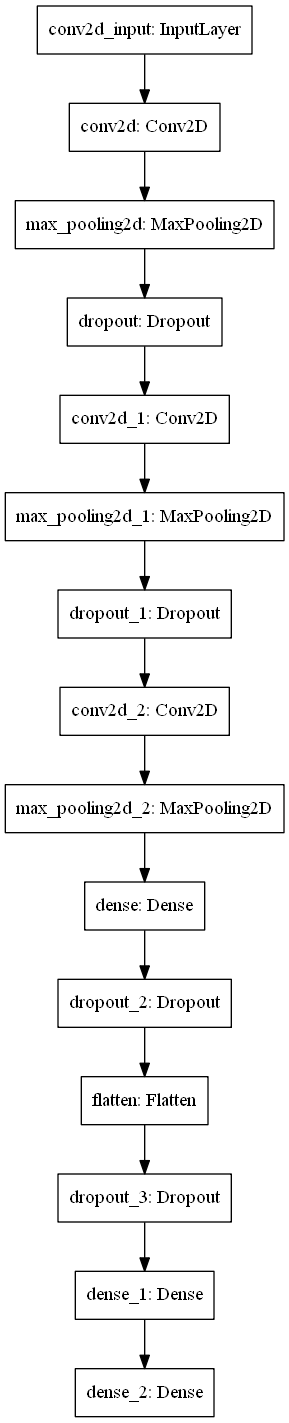

In [17]:
#Build the model

from tensorflow.keras.utils import plot_model
visible1 = (64,64,3)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [18]:
#Compile the model with hyperparameters

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [7]:
#Run the model with 1000 epochs
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_color_1000.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=1000, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/1000
76/76 [==============================] - ETA: 0s - loss: 2.2604 - accuracy: 0.3934 - precision: 0.4962 - recall: 0.1469
Epoch 00001: val_accuracy improved from -inf to 0.56482, saving model to best_model_color_1000.h5
76/76 [==============================] - 25s 332ms/step - loss: 2.2604 - accuracy: 0.3934 - precision: 0.4962 - recall: 0.1469 - val_loss: 1.2986 - val_accuracy: 0.5648 - val_precision: 0.9286 - val_recall: 0.0107
Epoch 2/1000
76/76 [==============================] - ETA: 0s - loss: 0.9037 - accuracy: 0.6105 - precision: 0.7139 - recall: 0.4568
Epoch 00002: val_accuracy improved from 0.56482 to 0.71098, saving model to best_model_color_1000.h5
76/76 [==============================] - 26s 336ms/step - loss: 0.9037 - accuracy: 0.6105 - precision: 0.7139 - recall: 0.4568 - val_loss: 0.7076 - val_accuracy: 0.7110 - val_precision: 0.8176 - val_recall: 0.5665
Epoch 3/1000
76/76 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.7804 -

Epoch 20/1000
76/76 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9384 - precision: 0.9429 - recall: 0.9351
Epoch 00020: val_accuracy improved from 0.94880 to 0.95954, saving model to best_model_color_1000.h5
76/76 [==============================] - 27s 350ms/step - loss: 0.1798 - accuracy: 0.9384 - precision: 0.9429 - recall: 0.9351 - val_loss: 0.1456 - val_accuracy: 0.9595 - val_precision: 0.9602 - val_recall: 0.9571
Epoch 21/1000
76/76 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.9372 - precision: 0.9423 - recall: 0.9314
Epoch 00021: val_accuracy did not improve from 0.95954
76/76 [==============================] - 25s 325ms/step - loss: 0.1809 - accuracy: 0.9372 - precision: 0.9423 - recall: 0.9314 - val_loss: 0.1357 - val_accuracy: 0.9579 - val_precision: 0.9633 - val_recall: 0.9538
Epoch 22/1000
76/76 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9378 - precision: 0.9428 - recall: 0.9326
Epoch 00022: v

Epoch 40/1000
76/76 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9533 - precision: 0.9547 - recall: 0.9492
Epoch 00040: val_accuracy did not improve from 0.96697
76/76 [==============================] - 27s 361ms/step - loss: 0.1323 - accuracy: 0.9533 - precision: 0.9547 - recall: 0.9492 - val_loss: 0.1194 - val_accuracy: 0.9620 - val_precision: 0.9627 - val_recall: 0.9587
Epoch 41/1000
76/76 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9568 - precision: 0.9599 - recall: 0.9554
Epoch 00041: val_accuracy did not improve from 0.96697
76/76 [==============================] - 34s 454ms/step - loss: 0.1232 - accuracy: 0.9568 - precision: 0.9599 - recall: 0.9554 - val_loss: 0.1377 - val_accuracy: 0.9513 - val_precision: 0.9565 - val_recall: 0.9438
Epoch 42/1000
76/76 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9622 - precision: 0.9655 - recall: 0.9597
Epoch 00042: val_accuracy did not improve from 0.96697
76/76

76/76 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9636 - precision: 0.9658 - recall: 0.9624
Epoch 00080: val_accuracy did not improve from 0.97275
76/76 [==============================] - 30s 396ms/step - loss: 0.1057 - accuracy: 0.9636 - precision: 0.9658 - recall: 0.9624 - val_loss: 0.1354 - val_accuracy: 0.9513 - val_precision: 0.9551 - val_recall: 0.9496
Epoch 81/1000
76/76 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9655 - precision: 0.9666 - recall: 0.9632
Epoch 00081: val_accuracy did not improve from 0.97275
76/76 [==============================] - 37s 488ms/step - loss: 0.0916 - accuracy: 0.9655 - precision: 0.9666 - recall: 0.9632 - val_loss: 0.1145 - val_accuracy: 0.9686 - val_precision: 0.9717 - val_recall: 0.9653
Epoch 82/1000
76/76 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9686 - precision: 0.9706 - recall: 0.9674
Epoch 00082: val_accuracy did not improve from 0.97275
76/76 [============

76/76 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9771 - precision: 0.9787 - recall: 0.9760
Epoch 00120: val_accuracy did not improve from 0.97440
76/76 [==============================] - 25s 333ms/step - loss: 0.0766 - accuracy: 0.9771 - precision: 0.9787 - recall: 0.9760 - val_loss: 0.1196 - val_accuracy: 0.9645 - val_precision: 0.9660 - val_recall: 0.9628
Epoch 121/1000
76/76 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9773 - precision: 0.9781 - recall: 0.9764
Epoch 00121: val_accuracy did not improve from 0.97440
76/76 [==============================] - 25s 333ms/step - loss: 0.0728 - accuracy: 0.9773 - precision: 0.9781 - recall: 0.9764 - val_loss: 0.1276 - val_accuracy: 0.9612 - val_precision: 0.9627 - val_recall: 0.9595
Epoch 122/1000
76/76 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9785 - precision: 0.9793 - recall: 0.9783
Epoch 00122: val_accuracy did not improve from 0.97440
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9738 - precision: 0.9745 - recall: 0.9731
Epoch 00160: val_accuracy did not improve from 0.97440
76/76 [==============================] - 26s 337ms/step - loss: 0.0775 - accuracy: 0.9738 - precision: 0.9745 - recall: 0.9731 - val_loss: 0.1056 - val_accuracy: 0.9694 - val_precision: 0.9718 - val_recall: 0.9686
Epoch 161/1000
76/76 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9723 - precision: 0.9733 - recall: 0.9719
Epoch 00161: val_accuracy did not improve from 0.97440
76/76 [==============================] - 25s 335ms/step - loss: 0.0782 - accuracy: 0.9723 - precision: 0.9733 - recall: 0.9719 - val_loss: 0.2634 - val_accuracy: 0.9282 - val_precision: 0.9326 - val_recall: 0.9249
Epoch 162/1000
76/76 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9758 - precision: 0.9764 - recall: 0.9748
Epoch 00162: val_accuracy did not improve from 0.97440
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9800 - precision: 0.9803 - recall: 0.9787
Epoch 00200: val_accuracy did not improve from 0.97770
76/76 [==============================] - 25s 332ms/step - loss: 0.0544 - accuracy: 0.9800 - precision: 0.9803 - recall: 0.9787 - val_loss: 0.0998 - val_accuracy: 0.9719 - val_precision: 0.9727 - val_recall: 0.9703
Epoch 201/1000
76/76 [==============================] - ETA: 0s - loss: 0.0598 - accuracy: 0.9812 - precision: 0.9818 - recall: 0.9806
Epoch 00201: val_accuracy did not improve from 0.97770
76/76 [==============================] - 26s 337ms/step - loss: 0.0598 - accuracy: 0.9812 - precision: 0.9818 - recall: 0.9806 - val_loss: 0.1132 - val_accuracy: 0.9719 - val_precision: 0.9726 - val_recall: 0.9678
Epoch 202/1000
76/76 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9798 - precision: 0.9806 - recall: 0.9791
Epoch 00202: val_accuracy did not improve from 0.97770
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9816 - precision: 0.9824 - recall: 0.9814
Epoch 00240: val_accuracy did not improve from 0.98018
76/76 [==============================] - 25s 333ms/step - loss: 0.0534 - accuracy: 0.9816 - precision: 0.9824 - recall: 0.9814 - val_loss: 0.1342 - val_accuracy: 0.9703 - val_precision: 0.9719 - val_recall: 0.9703
Epoch 241/1000
76/76 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9725 - precision: 0.9739 - recall: 0.9715
Epoch 00241: val_accuracy did not improve from 0.98018
76/76 [==============================] - 25s 334ms/step - loss: 0.0844 - accuracy: 0.9725 - precision: 0.9739 - recall: 0.9715 - val_loss: 0.1511 - val_accuracy: 0.9595 - val_precision: 0.9603 - val_recall: 0.9595
Epoch 242/1000
76/76 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9777 - precision: 0.9787 - recall: 0.9771
Epoch 00242: val_accuracy did not improve from 0.98018
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9849 - precision: 0.9853 - recall: 0.9835
Epoch 00280: val_accuracy did not improve from 0.98018
76/76 [==============================] - 27s 355ms/step - loss: 0.0544 - accuracy: 0.9849 - precision: 0.9853 - recall: 0.9835 - val_loss: 0.1100 - val_accuracy: 0.9777 - val_precision: 0.9801 - val_recall: 0.9777
Epoch 281/1000
76/76 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9874 - precision: 0.9880 - recall: 0.9872
Epoch 00281: val_accuracy did not improve from 0.98018
76/76 [==============================] - 27s 360ms/step - loss: 0.0376 - accuracy: 0.9874 - precision: 0.9880 - recall: 0.9872 - val_loss: 0.1332 - val_accuracy: 0.9744 - val_precision: 0.9743 - val_recall: 0.9719
Epoch 282/1000
76/76 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9874 - precision: 0.9888 - recall: 0.9864
Epoch 00282: val_accuracy did not improve from 0.98018
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9814 - precision: 0.9818 - recall: 0.9810
Epoch 00320: val_accuracy did not improve from 0.98018
76/76 [==============================] - 34s 446ms/step - loss: 0.0700 - accuracy: 0.9814 - precision: 0.9818 - recall: 0.9810 - val_loss: 0.1513 - val_accuracy: 0.9678 - val_precision: 0.9686 - val_recall: 0.9678
Epoch 321/1000
76/76 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9831 - precision: 0.9837 - recall: 0.9826
Epoch 00321: val_accuracy did not improve from 0.98018
76/76 [==============================] - 34s 444ms/step - loss: 0.0577 - accuracy: 0.9831 - precision: 0.9837 - recall: 0.9826 - val_loss: 0.1741 - val_accuracy: 0.9628 - val_precision: 0.9652 - val_recall: 0.9612
Epoch 322/1000
76/76 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9831 - precision: 0.9837 - recall: 0.9822
Epoch 00322: val_accuracy did not improve from 0.98018
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9835 - precision: 0.9845 - recall: 0.9820
Epoch 00360: val_accuracy did not improve from 0.98101
76/76 [==============================] - 37s 486ms/step - loss: 0.0591 - accuracy: 0.9835 - precision: 0.9845 - recall: 0.9820 - val_loss: 0.1190 - val_accuracy: 0.9727 - val_precision: 0.9759 - val_recall: 0.9711
Epoch 361/1000
76/76 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9872 - precision: 0.9884 - recall: 0.9868
Epoch 00361: val_accuracy did not improve from 0.98101
76/76 [==============================] - 38s 506ms/step - loss: 0.0378 - accuracy: 0.9872 - precision: 0.9884 - recall: 0.9868 - val_loss: 0.1178 - val_accuracy: 0.9719 - val_precision: 0.9727 - val_recall: 0.9703
Epoch 362/1000
76/76 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9880 - precision: 0.9886 - recall: 0.9868
Epoch 00362: val_accuracy did not improve from 0.98101
76/76 [==========

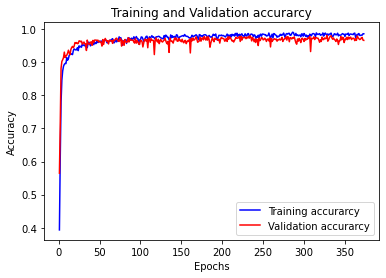

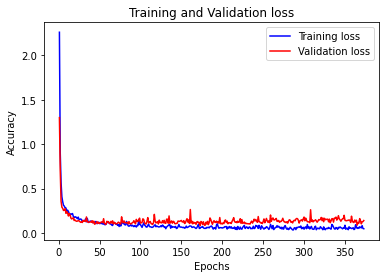

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
#Results on test dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_1000.h5')
y_pred = saved_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels)
print(classification_report(rounded_labels, y_pred_bool))

32/32 [==============================] - 3s 95ms/step
[4 4 4 ... 2 4 2]
[4 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       263
           1       0.91      0.71      0.80        28
           2       0.92      0.96      0.94       523
           3       1.00      1.00      1.00       523
           4       0.98      0.97      0.98       680

    accuracy                           0.96      2017
   macro avg       0.94      0.90      0.92      2017
weighted avg       0.96      0.96      0.96      2017



In [11]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_1000.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 6s 32ms/step - loss: 0.0356 - accuracy: 0.9954 - precision: 0.9955 - recall: 0.9950
Train loss is 0.03562626242637634
Train accuracy is 0.9953726530075073
Train Precision is 0.9955357313156128
Train Recall is 0.9950421452522278
Train f1_score is 0.995288877088826


In [10]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [11]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[0 0 0 ... 4 4 4]


In [12]:
import pandas as pd
df = pd.read_csv("E:/Meat_Excels/MeatCutPredictions.csv")
df["Colour_Predition_1000"] = prediction__class

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

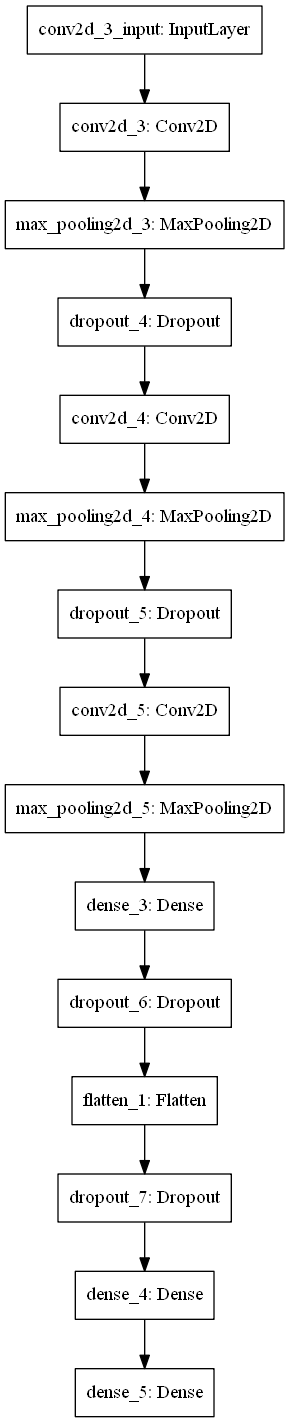

In [13]:
#Build the model

from tensorflow.keras.utils import plot_model
visible1 = (64,64,3)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [14]:
#Compile the model with hyperparameters

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [15]:
#Run the model with 25 epochs
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_color_25.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=25, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/25
76/76 [==============================] - ETA: 0s - loss: 2.1640 - accuracy: 0.3812 - precision_1: 0.4729 - recall_1: 0.1064
Epoch 00001: val_accuracy improved from -inf to 0.53922, saving model to best_model_color_25.h5
76/76 [==============================] - 40s 524ms/step - loss: 2.1640 - accuracy: 0.3812 - precision_1: 0.4729 - recall_1: 0.1064 - val_loss: 1.2605 - val_accuracy: 0.5392 - val_precision_1: 0.8943 - val_recall_1: 0.0908
Epoch 2/25
76/76 [==============================] - ETA: 0s - loss: 1.0310 - accuracy: 0.5709 - precision_1: 0.6917 - recall_1: 0.3932
Epoch 00002: val_accuracy improved from 0.53922 to 0.66887, saving model to best_model_color_25.h5
76/76 [==============================] - 39s 517ms/step - loss: 1.0310 - accuracy: 0.5709 - precision_1: 0.6917 - recall_1: 0.3932 - val_loss: 0.8848 - val_accuracy: 0.6689 - val_precision_1: 0.8597 - val_recall_1: 0.3947
Epoch 3/25
76/76 [==============================] - ETA: 0s - loss: 0.7541 - accu

Epoch 20/25
76/76 [==============================] - ETA: 0s - loss: 0.2182 - accuracy: 0.9192 - precision_1: 0.9249 - recall_1: 0.9116
Epoch 00020: val_accuracy did not improve from 0.94467
76/76 [==============================] - 28s 372ms/step - loss: 0.2182 - accuracy: 0.9192 - precision_1: 0.9249 - recall_1: 0.9116 - val_loss: 0.2564 - val_accuracy: 0.9133 - val_precision_1: 0.9233 - val_recall_1: 0.9042
Epoch 21/25
76/76 [==============================] - ETA: 0s - loss: 0.2343 - accuracy: 0.9186 - precision_1: 0.9233 - recall_1: 0.9097
Epoch 00021: val_accuracy did not improve from 0.94467
76/76 [==============================] - 28s 370ms/step - loss: 0.2343 - accuracy: 0.9186 - precision_1: 0.9233 - recall_1: 0.9097 - val_loss: 0.2128 - val_accuracy: 0.9191 - val_precision_1: 0.9273 - val_recall_1: 0.9158
Epoch 22/25
76/76 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9242 - precision_1: 0.9301 - recall_1: 0.9209
Epoch 00022: val_accuracy did not impr

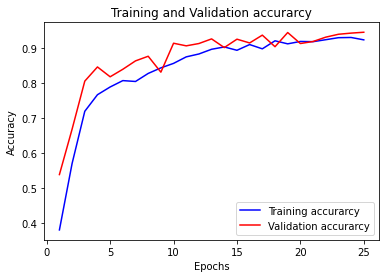

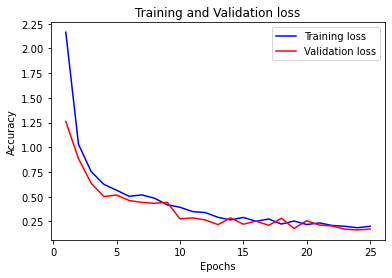

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#Results on test dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_25.h5')
y_pred = saved_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels)
print(classification_report(rounded_labels, y_pred_bool))

32/32 [==============================] - 3s 92ms/step
[4 4 4 ... 2 4 2]
[4 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       263
           1       1.00      0.61      0.76        28
           2       0.93      0.91      0.92       523
           3       0.99      1.00      1.00       523
           4       0.97      0.98      0.97       680

    accuracy                           0.95      2017
   macro avg       0.95      0.88      0.90      2017
weighted avg       0.95      0.95      0.95      2017



In [12]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_25.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 6s 33ms/step - loss: 0.1360 - accuracy: 0.9590 - precision_1: 0.9643 - recall_1: 0.9541
Train loss is 0.13596118986606598
Train accuracy is 0.9590150117874146
Train Precision is 0.9642558693885803
Train Recall is 0.9540571570396423
Train f1_score is 0.9591294024839689


In [18]:
prediction_25 = saved_model.predict(X)[:,1].tolist()
print(len(prediction_25))

8068


In [19]:
prediction__class25 = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class25)

[0 0 0 ... 4 4 4]


In [20]:
df["Colour_Predition_25"] = prediction__class25

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)         

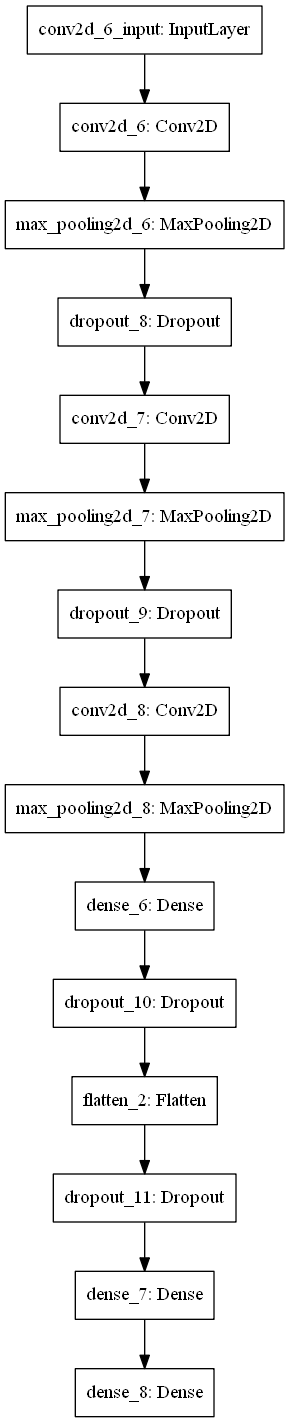

In [21]:
#Build the model

from tensorflow.keras.utils import plot_model
visible1 = (64,64,3)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [22]:
#Compile the model with hyperparameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [19]:
#Run the model with 50 epochs
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_color_50.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/50
76/76 [==============================] - ETA: 0s - loss: 2.4449 - accuracy: 0.3841 - precision: 0.4639 - recall: 0.1273
Epoch 00001: val_accuracy improved from -inf to 0.62428, saving model to best_model_color_50.h5
76/76 [==============================] - 35s 464ms/step - loss: 2.4449 - accuracy: 0.3841 - precision: 0.4639 - recall: 0.1273 - val_loss: 0.9549 - val_accuracy: 0.6243 - val_precision: 0.9461 - val_recall: 0.2320
Epoch 2/50
76/76 [==============================] - ETA: 0s - loss: 0.9413 - accuracy: 0.6025 - precision: 0.6775 - recall: 0.4676
Epoch 00002: val_accuracy improved from 0.62428 to 0.68538, saving model to best_model_color_50.h5
76/76 [==============================] - 33s 433ms/step - loss: 0.9413 - accuracy: 0.6025 - precision: 0.6775 - recall: 0.4676 - val_loss: 0.8828 - val_accuracy: 0.6854 - val_precision: 0.9163 - val_recall: 0.3889
Epoch 3/50
76/76 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7118 - precision

Epoch 40/50
76/76 [==============================] - ETA: 0s - loss: 0.1620 - accuracy: 0.9452 - precision: 0.9479 - recall: 0.9403
Epoch 00040: val_accuracy did not improve from 0.96284
76/76 [==============================] - 25s 333ms/step - loss: 0.1620 - accuracy: 0.9452 - precision: 0.9479 - recall: 0.9403 - val_loss: 0.1431 - val_accuracy: 0.9579 - val_precision: 0.9593 - val_recall: 0.9529
Epoch 41/50
76/76 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9535 - precision: 0.9579 - recall: 0.9494
Epoch 00041: val_accuracy did not improve from 0.96284
76/76 [==============================] - 27s 356ms/step - loss: 0.1402 - accuracy: 0.9535 - precision: 0.9579 - recall: 0.9494 - val_loss: 0.1632 - val_accuracy: 0.9505 - val_precision: 0.9542 - val_recall: 0.9472
Epoch 42/50
76/76 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9500 - precision: 0.9541 - recall: 0.9481
Epoch 00042: val_accuracy did not improve from 0.96284
76/76 [====

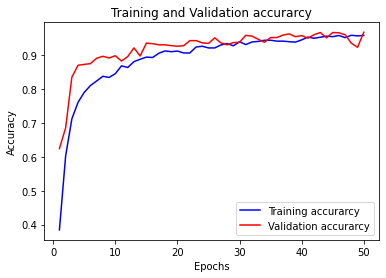

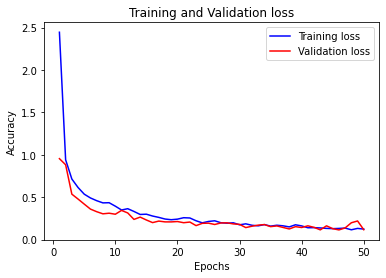

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
#Results on test dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_50.h5')

y_pred = saved_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels)
print(classification_report(rounded_labels, y_pred_bool))

32/32 [==============================] - 3s 87ms/step
[4 4 4 ... 2 4 2]
[4 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       263
           1       0.93      0.50      0.65        28
           2       0.95      0.98      0.96       523
           3       0.99      1.00      1.00       523
           4       0.98      0.98      0.98       680

    accuracy                           0.97      2017
   macro avg       0.96      0.88      0.91      2017
weighted avg       0.97      0.97      0.97      2017



In [22]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_50.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 10s 52ms/step - loss: 0.0684 - accuracy: 0.9822 - precision: 0.9834 - recall: 0.9812 5s - lo - ETA: 1s - loss: 0.0580 - accuracy: 0.9854 - pr
Train loss is 0.06835677474737167
Train accuracy is 0.9821516871452332
Train Precision is 0.9834354519844055
Train Recall is 0.9811601638793945
Train f1_score is 0.9822964903742513


In [26]:
prediction_50 = saved_model.predict(X)[:,1].tolist()
print(len(prediction_50))

8068


In [27]:
prediction__class50 = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class50)

[0 0 0 ... 4 4 4]


In [28]:
df["Colour_Predition_50"] = prediction__class50

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)         

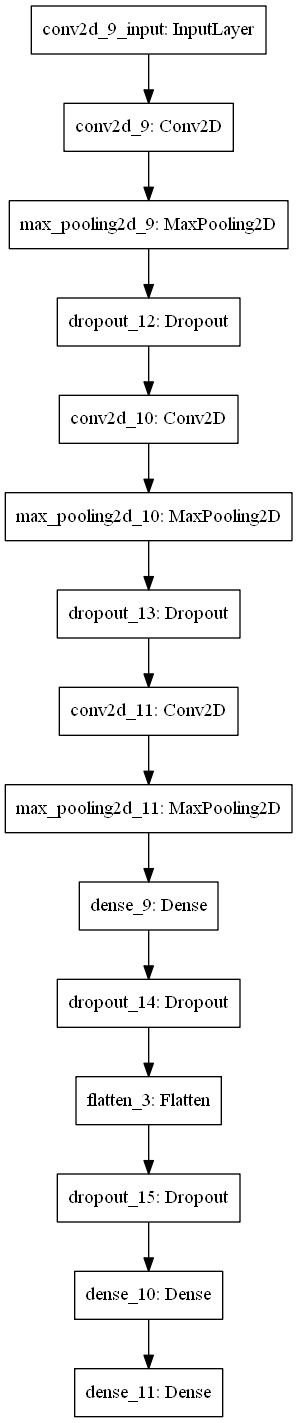

In [29]:
#Build the model

from tensorflow.keras.utils import plot_model
visible1 = (64,64,3)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [30]:
#Compile the model with hyperparameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [31]:
#Run the model with 100 epochs
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_color_100.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/100
76/76 [==============================] - ETA: 0s - loss: 2.2446 - accuracy: 0.3845 - precision_3: 0.5127 - recall_3: 0.1372
Epoch 00001: val_accuracy improved from -inf to 0.31544, saving model to best_model_color_100.h5
76/76 [==============================] - 30s 399ms/step - loss: 2.2446 - accuracy: 0.3845 - precision_3: 0.5127 - recall_3: 0.1372 - val_loss: 1.5171 - val_accuracy: 0.3154 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/100
76/76 [==============================] - ETA: 0s - loss: 0.9361 - accuracy: 0.6101 - precision_3: 0.7198 - recall_3: 0.4316
Epoch 00002: val_accuracy improved from 0.31544 to 0.52353, saving model to best_model_color_100.h5
76/76 [==============================] - 30s 389ms/step - loss: 0.9361 - accuracy: 0.6101 - precision_3: 0.7198 - recall_3: 0.4316 - val_loss: 1.2093 - val_accuracy: 0.5235 - val_precision_3: 0.6628 - val_recall_3: 0.0941
Epoch 3/100
76/76 [==============================] - ETA: 0s - loss: 

76/76 [==============================] - ETA: 0s - loss: 0.2031 - accuracy: 0.9271 - precision_3: 0.9332 - recall_3: 0.9231
Epoch 00038: val_accuracy did not improve from 0.94467
76/76 [==============================] - 29s 377ms/step - loss: 0.2031 - accuracy: 0.9271 - precision_3: 0.9332 - recall_3: 0.9231 - val_loss: 0.1637 - val_accuracy: 0.9422 - val_precision_3: 0.9465 - val_recall_3: 0.9356
Epoch 39/100
76/76 [==============================] - ETA: 0s - loss: 0.2131 - accuracy: 0.9219 - precision_3: 0.9292 - recall_3: 0.9167
Epoch 00039: val_accuracy did not improve from 0.94467
76/76 [==============================] - 29s 377ms/step - loss: 0.2131 - accuracy: 0.9219 - precision_3: 0.9292 - recall_3: 0.9167 - val_loss: 0.1846 - val_accuracy: 0.9331 - val_precision_3: 0.9482 - val_recall_3: 0.9216
Epoch 40/100
76/76 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9215 - precision_3: 0.9291 - recall_3: 0.9147
Epoch 00040: val_accuracy did not improve from 0

Epoch 58/100
76/76 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9508 - precision_3: 0.9543 - recall_3: 0.9483
Epoch 00058: val_accuracy did not improve from 0.95128
76/76 [==============================] - 36s 476ms/step - loss: 0.1432 - accuracy: 0.9508 - precision_3: 0.9543 - recall_3: 0.9483 - val_loss: 0.2148 - val_accuracy: 0.9265 - val_precision_3: 0.9298 - val_recall_3: 0.9191
Epoch 59/100
76/76 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9403 - precision_3: 0.9440 - recall_3: 0.9372
Epoch 00059: val_accuracy improved from 0.95128 to 0.95211, saving model to best_model_color_100.h5
76/76 [==============================] - 35s 465ms/step - loss: 0.1675 - accuracy: 0.9403 - precision_3: 0.9440 - recall_3: 0.9372 - val_loss: 0.1597 - val_accuracy: 0.9521 - val_precision_3: 0.9574 - val_recall_3: 0.9455
Epoch 60/100
76/76 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.9436 - precision_3: 0.9476 - recall_

Epoch 97/100
76/76 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9570 - precision_3: 0.9603 - recall_3: 0.9539
Epoch 00097: val_accuracy did not improve from 0.96036
76/76 [==============================] - 44s 582ms/step - loss: 0.1209 - accuracy: 0.9570 - precision_3: 0.9603 - recall_3: 0.9539 - val_loss: 0.1470 - val_accuracy: 0.9587 - val_precision_3: 0.9642 - val_recall_3: 0.9554
Epoch 98/100
76/76 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.9649 - precision_3: 0.9674 - recall_3: 0.9632
Epoch 00098: val_accuracy did not improve from 0.96036
76/76 [==============================] - 34s 442ms/step - loss: 0.1055 - accuracy: 0.9649 - precision_3: 0.9674 - recall_3: 0.9632 - val_loss: 0.1371 - val_accuracy: 0.9554 - val_precision_3: 0.9601 - val_recall_3: 0.9538
Epoch 99/100
76/76 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9676 - precision_3: 0.9687 - recall_3: 0.9663
Epoch 00099: val_accuracy improved 

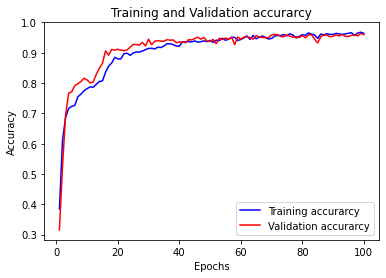

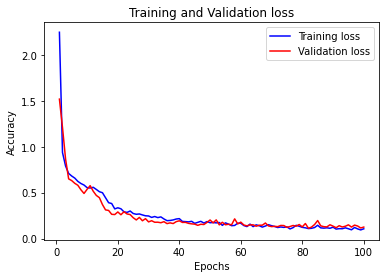

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#Results on test dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_100.h5')
y_pred = saved_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels)
print(classification_report(rounded_labels, y_pred_bool))

32/32 [==============================] - 3s 95ms/step
[4 4 4 ... 2 4 2]
[4 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       263
           1       1.00      0.64      0.78        28
           2       0.96      0.93      0.94       523
           3       0.99      1.00      0.99       523
           4       0.98      0.98      0.98       680

    accuracy                           0.96      2017
   macro avg       0.96      0.90      0.92      2017
weighted avg       0.96      0.96      0.96      2017



In [14]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_100.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 7s 37ms/step - loss: 0.0458 - accuracy: 0.9886 - precision_3: 0.9896 - recall_3: 0.9871
Train loss is 0.04579979553818703
Train accuracy is 0.9885969161987305
Train Precision is 0.9895626306533813
Train Recall is 0.9871095418930054
Train f1_score is 0.9883345641076694


In [34]:
prediction_100 = saved_model.predict(X)[:,1].tolist()
print(len(prediction_100))

8068


In [35]:
prediction__class100 = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class100)

[0 0 0 ... 4 4 4]


In [36]:
df["Colour_Predition_100"] = prediction__class100

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)         

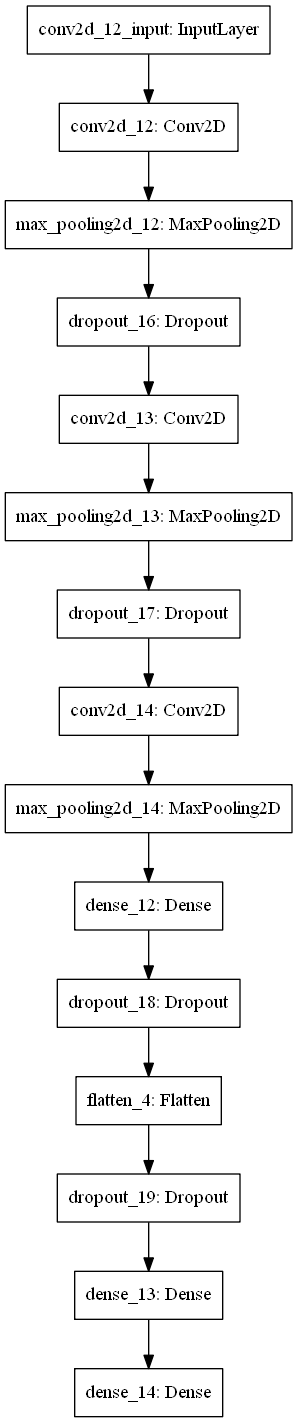

In [37]:
#Build the model

from tensorflow.keras.utils import plot_model
visible1 = (64,64,3)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [38]:
#Compile the model with hyperparameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [39]:
#Run the model with 150 epochs
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_color_150.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=150, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/150
76/76 [==============================] - ETA: 0s - loss: 2.2988 - accuracy: 0.3890 - precision_4: 0.4478 - recall_4: 0.1107
Epoch 00001: val_accuracy improved from -inf to 0.50289, saving model to best_model_color_150.h5
76/76 [==============================] - 39s 519ms/step - loss: 2.2988 - accuracy: 0.3890 - precision_4: 0.4478 - recall_4: 0.1107 - val_loss: 1.2877 - val_accuracy: 0.5029 - val_precision_4: 0.8750 - val_recall_4: 0.0173
Epoch 2/150
76/76 [==============================] - ETA: 0s - loss: 0.8253 - accuracy: 0.6876 - precision_4: 0.7391 - recall_4: 0.5758
Epoch 00002: val_accuracy improved from 0.50289 to 0.78200, saving model to best_model_color_150.h5
76/76 [==============================] - 38s 495ms/step - loss: 0.8253 - accuracy: 0.6876 - precision_4: 0.7391 - recall_4: 0.5758 - val_loss: 0.6312 - val_accuracy: 0.7820 - val_precision_4: 0.8457 - val_recall_4: 0.6606
Epoch 3/150
76/76 [==============================] - ETA: 0s - loss: 0.6233 -

Epoch 20/150
76/76 [==============================] - ETA: 0s - loss: 0.2466 - accuracy: 0.9079 - precision_4: 0.9154 - recall_4: 0.8988
Epoch 00020: val_accuracy did not improve from 0.95045
76/76 [==============================] - 28s 367ms/step - loss: 0.2466 - accuracy: 0.9079 - precision_4: 0.9154 - recall_4: 0.8988 - val_loss: 0.1896 - val_accuracy: 0.9372 - val_precision_4: 0.9415 - val_recall_4: 0.9298
Epoch 21/150
76/76 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9225 - precision_4: 0.9272 - recall_4: 0.9163
Epoch 00021: val_accuracy did not improve from 0.95045
76/76 [==============================] - 29s 387ms/step - loss: 0.2148 - accuracy: 0.9225 - precision_4: 0.9272 - recall_4: 0.9163 - val_loss: 0.2384 - val_accuracy: 0.9174 - val_precision_4: 0.9333 - val_recall_4: 0.9017
Epoch 22/150
76/76 [==============================] - ETA: 0s - loss: 0.2063 - accuracy: 0.9246 - precision_4: 0.9331 - recall_4: 0.9159
Epoch 00022: val_accuracy did not i

Epoch 40/150
76/76 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 0.9481 - precision_4: 0.9522 - recall_4: 0.9434
Epoch 00040: val_accuracy did not improve from 0.96201
76/76 [==============================] - 25s 334ms/step - loss: 0.1437 - accuracy: 0.9481 - precision_4: 0.9522 - recall_4: 0.9434 - val_loss: 0.1974 - val_accuracy: 0.9273 - val_precision_4: 0.9347 - val_recall_4: 0.9224
Epoch 41/150
76/76 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9446 - precision_4: 0.9487 - recall_4: 0.9430
Epoch 00041: val_accuracy did not improve from 0.96201
76/76 [==============================] - 26s 338ms/step - loss: 0.1568 - accuracy: 0.9446 - precision_4: 0.9487 - recall_4: 0.9430 - val_loss: 0.1570 - val_accuracy: 0.9538 - val_precision_4: 0.9576 - val_recall_4: 0.9505
Epoch 42/150
76/76 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9469 - precision_4: 0.9500 - recall_4: 0.9428
Epoch 00042: val_accuracy did not i

Epoch 60/150
76/76 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9622 - precision_4: 0.9643 - recall_4: 0.9601
Epoch 00060: val_accuracy improved from 0.96532 to 0.97027, saving model to best_model_color_150.h5
76/76 [==============================] - 26s 337ms/step - loss: 0.1063 - accuracy: 0.9622 - precision_4: 0.9643 - recall_4: 0.9601 - val_loss: 0.1113 - val_accuracy: 0.9703 - val_precision_4: 0.9734 - val_recall_4: 0.9670
Epoch 61/150
76/76 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9589 - precision_4: 0.9614 - recall_4: 0.9574
Epoch 00061: val_accuracy did not improve from 0.97027
76/76 [==============================] - 25s 335ms/step - loss: 0.1160 - accuracy: 0.9589 - precision_4: 0.9614 - recall_4: 0.9574 - val_loss: 0.1152 - val_accuracy: 0.9661 - val_precision_4: 0.9685 - val_recall_4: 0.9653
Epoch 62/150
76/76 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9568 - precision_4: 0.9597 - recall_

Epoch 80/150
76/76 [==============================] - ETA: 0s - loss: 0.0980 - accuracy: 0.9636 - precision_4: 0.9650 - recall_4: 0.9626
Epoch 00080: val_accuracy did not improve from 0.97027
76/76 [==============================] - 25s 332ms/step - loss: 0.0980 - accuracy: 0.9636 - precision_4: 0.9650 - recall_4: 0.9626 - val_loss: 0.1059 - val_accuracy: 0.9703 - val_precision_4: 0.9726 - val_recall_4: 0.9670
Epoch 81/150
76/76 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9601 - precision_4: 0.9622 - recall_4: 0.9576
Epoch 00081: val_accuracy did not improve from 0.97027
76/76 [==============================] - 26s 338ms/step - loss: 0.1154 - accuracy: 0.9601 - precision_4: 0.9622 - recall_4: 0.9576 - val_loss: 0.1200 - val_accuracy: 0.9628 - val_precision_4: 0.9692 - val_recall_4: 0.9604
Epoch 82/150
76/76 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9643 - precision_4: 0.9650 - recall_4: 0.9630
Epoch 00082: val_accuracy did not i

Epoch 100/150
76/76 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9562 - precision_4: 0.9597 - recall_4: 0.9539
Epoch 00100: val_accuracy did not improve from 0.97275
76/76 [==============================] - 25s 332ms/step - loss: 0.1102 - accuracy: 0.9562 - precision_4: 0.9597 - recall_4: 0.9539 - val_loss: 0.1259 - val_accuracy: 0.9628 - val_precision_4: 0.9644 - val_recall_4: 0.9620
Epoch 101/150
76/76 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9702 - precision_4: 0.9712 - recall_4: 0.9684
Epoch 00101: val_accuracy did not improve from 0.97275
76/76 [==============================] - 27s 355ms/step - loss: 0.0864 - accuracy: 0.9702 - precision_4: 0.9712 - recall_4: 0.9684 - val_loss: 0.1230 - val_accuracy: 0.9653 - val_precision_4: 0.9676 - val_recall_4: 0.9628
Epoch 102/150
76/76 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9702 - precision_4: 0.9710 - recall_4: 0.9692
Epoch 00102: val_accuracy did no

Epoch 120/150
76/76 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9748 - precision_4: 0.9760 - recall_4: 0.9744
Epoch 00120: val_accuracy did not improve from 0.97358
76/76 [==============================] - 25s 325ms/step - loss: 0.0699 - accuracy: 0.9748 - precision_4: 0.9760 - recall_4: 0.9744 - val_loss: 0.1106 - val_accuracy: 0.9719 - val_precision_4: 0.9727 - val_recall_4: 0.9719
Epoch 121/150
76/76 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9727 - precision_4: 0.9733 - recall_4: 0.9717
Epoch 00121: val_accuracy did not improve from 0.97358
76/76 [==============================] - 25s 328ms/step - loss: 0.0849 - accuracy: 0.9727 - precision_4: 0.9733 - recall_4: 0.9717 - val_loss: 0.1168 - val_accuracy: 0.9694 - val_precision_4: 0.9710 - val_recall_4: 0.9686
Epoch 122/150
76/76 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9752 - precision_4: 0.9762 - recall_4: 0.9746
Epoch 00122: val_accuracy did no

Epoch 140/150
76/76 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9746 - precision_4: 0.9752 - recall_4: 0.9740
Epoch 00140: val_accuracy did not improve from 0.97358
76/76 [==============================] - 25s 327ms/step - loss: 0.0715 - accuracy: 0.9746 - precision_4: 0.9752 - recall_4: 0.9740 - val_loss: 0.1091 - val_accuracy: 0.9703 - val_precision_4: 0.9711 - val_recall_4: 0.9703
Epoch 141/150
76/76 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9746 - precision_4: 0.9754 - recall_4: 0.9738
Epoch 00141: val_accuracy did not improve from 0.97358
76/76 [==============================] - 25s 331ms/step - loss: 0.0710 - accuracy: 0.9746 - precision_4: 0.9754 - recall_4: 0.9738 - val_loss: 0.1042 - val_accuracy: 0.9694 - val_precision_4: 0.9702 - val_recall_4: 0.9678
Epoch 142/150
76/76 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9731 - precision_4: 0.9743 - recall_4: 0.9721
Epoch 00142: val_accuracy did no

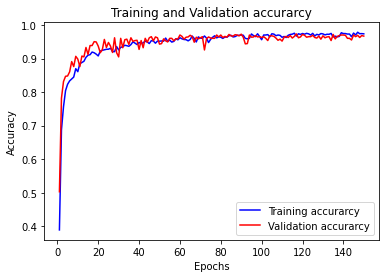

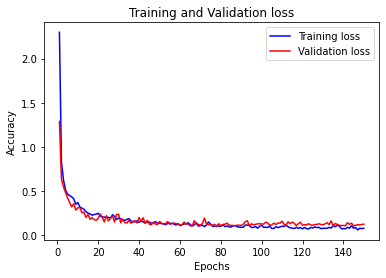

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_150.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 4s 51ms/step - loss: 0.1166 - accuracy: 0.9658 - precision_4: 0.9687 - recall_4: 0.9653
Test loss is 0.11659552901983261
Test accuracy is 0.9657907485961914
Test Precision is 0.9686567187309265
Test Recall is 0.9652950167655945
Test f1_score is 0.9669729460000348


In [15]:
#Results on test dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_150.h5')
y_pred = saved_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels)
print(classification_report(rounded_labels, y_pred_bool))

32/32 [==============================] - 3s 80ms/step
[4 4 4 ... 2 4 2]
[4 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       263
           1       0.78      0.64      0.71        28
           2       0.97      0.95      0.96       523
           3       0.98      1.00      0.99       523
           4       0.98      0.97      0.97       680

    accuracy                           0.97      2017
   macro avg       0.92      0.90      0.91      2017
weighted avg       0.97      0.97      0.97      2017



In [10]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_color_150.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 6s 32ms/step - loss: 0.0419 - accuracy: 0.9898 - precision_4: 0.9904 - recall_4: 0.9888: 4s -
Train loss is 0.041880588978528976
Train accuracy is 0.989753782749176
Train Precision is 0.9903989434242249
Train Recall is 0.9887621998786926
Train f1_score is 0.9895798948673973


In [42]:
prediction_150 = saved_model.predict(X)[:,1].tolist()
print(len(prediction_150))

8068


In [43]:
prediction__class150 = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class150)

[0 0 0 ... 4 4 4]


In [44]:
df["Colour_Predition_150"] = prediction__class150

In [45]:
df.to_csv("E:/Meat_Excels/MeatCutPredictions.csv")